<a href="https://colab.research.google.com/github/ilinashah177/Coursework-Website/blob/main/BRI_Investments_vs_Environment_multi_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Draw graphs "inline" in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
#Make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")


In [2]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving Stepwise.xlsx to Stepwise.xlsx


In [6]:
!pip install openpyxl
import pandas as pd

#Name of uploaded file
file_name = 'Stepwise.xlsx'

#Read data from the required sheet
df = pd.read_excel('Stepwise.xlsx', engine='openpyxl') # Use pd.read_excel and specify the engine

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df

,Year,BRI Investments (USD millions),Total Energy Capacity Added from Completed CPEC Projects (MW),Total electricity consumption (GWh),Access to electricity (% of population),Annual change in coal energy consumption (TWh),Annual change in renewable energy consumption (TWh),Annual CO2 emissions (millon tonnes)
0,2015,520.40,400,85818,91.0,0.0,1.96,150.59
1,2016,893.25,650,90431,91.8,7.9,6.75,178.03
2,2017,2296.00,1469,95529,92.7,21.0,-7.66,218.36
3,2018,2062.00,1420,106928,93.4,54.5,0.43,210.35
4,2019,2907.00,1980,109461,93.9,18.9,16.68,207.62
5,2020,1600.00,701,108371,94.5,25.2,8.71,230.75
6,2021,2400.00,1100,116816,94.9,19.0,-4.51,247.90
7,2022,2716.00,1380,111263,95.0,-22.2,-4.25,223.83
8,2023,1440.00,1320,114300,95.6,-7.1,6.55,200.67


In [7]:
non_numeric_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("Non-numeric columns:")
non_numeric_cols


for col in non_numeric_cols:
    try:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')
    except:
        print(f"Could not convert column '{col}' to numeric.")

df

Non-numeric columns:


,Year,BRI Investments (USD millions),Total Energy Capacity Added from Completed CPEC Projects (MW),Total electricity consumption (GWh),Access to electricity (% of population),Annual change in coal energy consumption (TWh),Annual change in renewable energy consumption (TWh),Annual CO2 emissions (millon tonnes)
0,2015,520.40,400,85818,91.0,0.0,1.96,150.59
1,2016,893.25,650,90431,91.8,7.9,6.75,178.03
2,2017,2296.00,1469,95529,92.7,21.0,-7.66,218.36
3,2018,2062.00,1420,106928,93.4,54.5,0.43,210.35
4,2019,2907.00,1980,109461,93.9,18.9,16.68,207.62
5,2020,1600.00,701,108371,94.5,25.2,8.71,230.75
6,2021,2400.00,1100,116816,94.9,19.0,-4.51,247.90
7,2022,2716.00,1380,111263,95.0,-22.2,-4.25,223.83
8,2023,1440.00,1320,114300,95.6,-7.1,6.55,200.67


In [8]:
#Generate summary statistics, and round everything to 2 decimal places
summary=df.describe().round(2)
summary

,Year,BRI Investments (USD millions),Total Energy Capacity Added from Completed CPEC Projects (MW),Total electricity consumption (GWh),Access to electricity (% of population),Annual change in coal energy consumption (TWh),Annual change in renewable energy consumption (TWh),Annual CO2 emissions (millon tonnes)
count,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00
mean,2019.00,1870.52,1157.78,104324.11,93.64,13.02,2.74,207.57
std,2.74,815.75,495.15,10989.24,1.56,21.92,7.71,28.98
min,2015.00,520.40,400.00,85818.00,91.00,-22.20,-7.66,150.59
25%,2017.00,1440.00,701.00,95529.00,92.70,0.00,-4.25,200.67
50%,2019.00,2062.00,1320.00,108371.00,93.90,18.90,1.96,210.35
75%,2021.00,2400.00,1420.00,111263.00,94.90,21.00,6.75,223.83
max,2023.00,2907.00,1980.00,116816.00,95.60,54.50,16.68,247.90


In [9]:
def replace_outliers_with_nan(series, factor=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr
    return series.mask((series < lower_bound) | (series > upper_bound))

# Iterate through numeric columns and replace outliers
for col in df.select_dtypes(include=np.number).columns:
    df[col] = replace_outliers_with_nan(df[col])

df

,Year,BRI Investments (USD millions),Total Energy Capacity Added from Completed CPEC Projects (MW),Total electricity consumption (GWh),Access to electricity (% of population),Annual change in coal energy consumption (TWh),Annual change in renewable energy consumption (TWh),Annual CO2 emissions (millon tonnes)
0,2015,520.40,400,85818,91.0,0.0,1.96,NaN
1,2016,893.25,650,90431,91.8,7.9,6.75,178.03
2,2017,2296.00,1469,95529,92.7,21.0,-7.66,218.36
3,2018,2062.00,1420,106928,93.4,NaN,0.43,210.35
4,2019,2907.00,1980,109461,93.9,18.9,16.68,207.62
5,2020,1600.00,701,108371,94.5,25.2,8.71,230.75
6,2021,2400.00,1100,116816,94.9,19.0,-4.51,247.90
7,2022,2716.00,1380,111263,95.0,-22.2,-4.25,223.83
8,2023,1440.00,1320,114300,95.6,-7.1,6.55,200.67


In [10]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    # Initialize df with data_cleaned to ensure it's defined
    df = df.copy()

    # Drop rows with any missing values
    df = df.dropna()

    while True:
        #Adding a constant item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i)
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        #Drop the const as const should not be removed
        vif_df = vif_df.drop('const')

        #Drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)

        print('Max VIF:', vif_df.VIF.max())

        #If the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            #If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            #No VIF is above threshold, exit the loop
            break

    return df

In [18]:
predictor_vars=['Annual change in renewable energy consumption (TWh)', 'Annual change in coal energy consumption (TWh)', 'Total electricity consumption (GWh)', 'Total Energy Capacity Added from Completed CPEC Projects (MW)', 'BRI Investments (USD millions)']

vif = drop_column_using_vif_(df[predictor_vars], thresh=10)
print("The columns remaining after VIF selection are:")
print(vif.columns)

Max VIF: 7.276570769351668
The columns remaining after VIF selection are:
Index(['Annual change in renewable energy consumption (TWh)',
       'Annual change in coal energy consumption (TWh)',
       'Total electricity consumption (GWh)',
       'Total Energy Capacity Added from Completed CPEC Projects (MW)',
       'BRI Investments (USD millions)'],
      dtype='object')


Text(0.5, 1.0, 'Correlation Matrix')

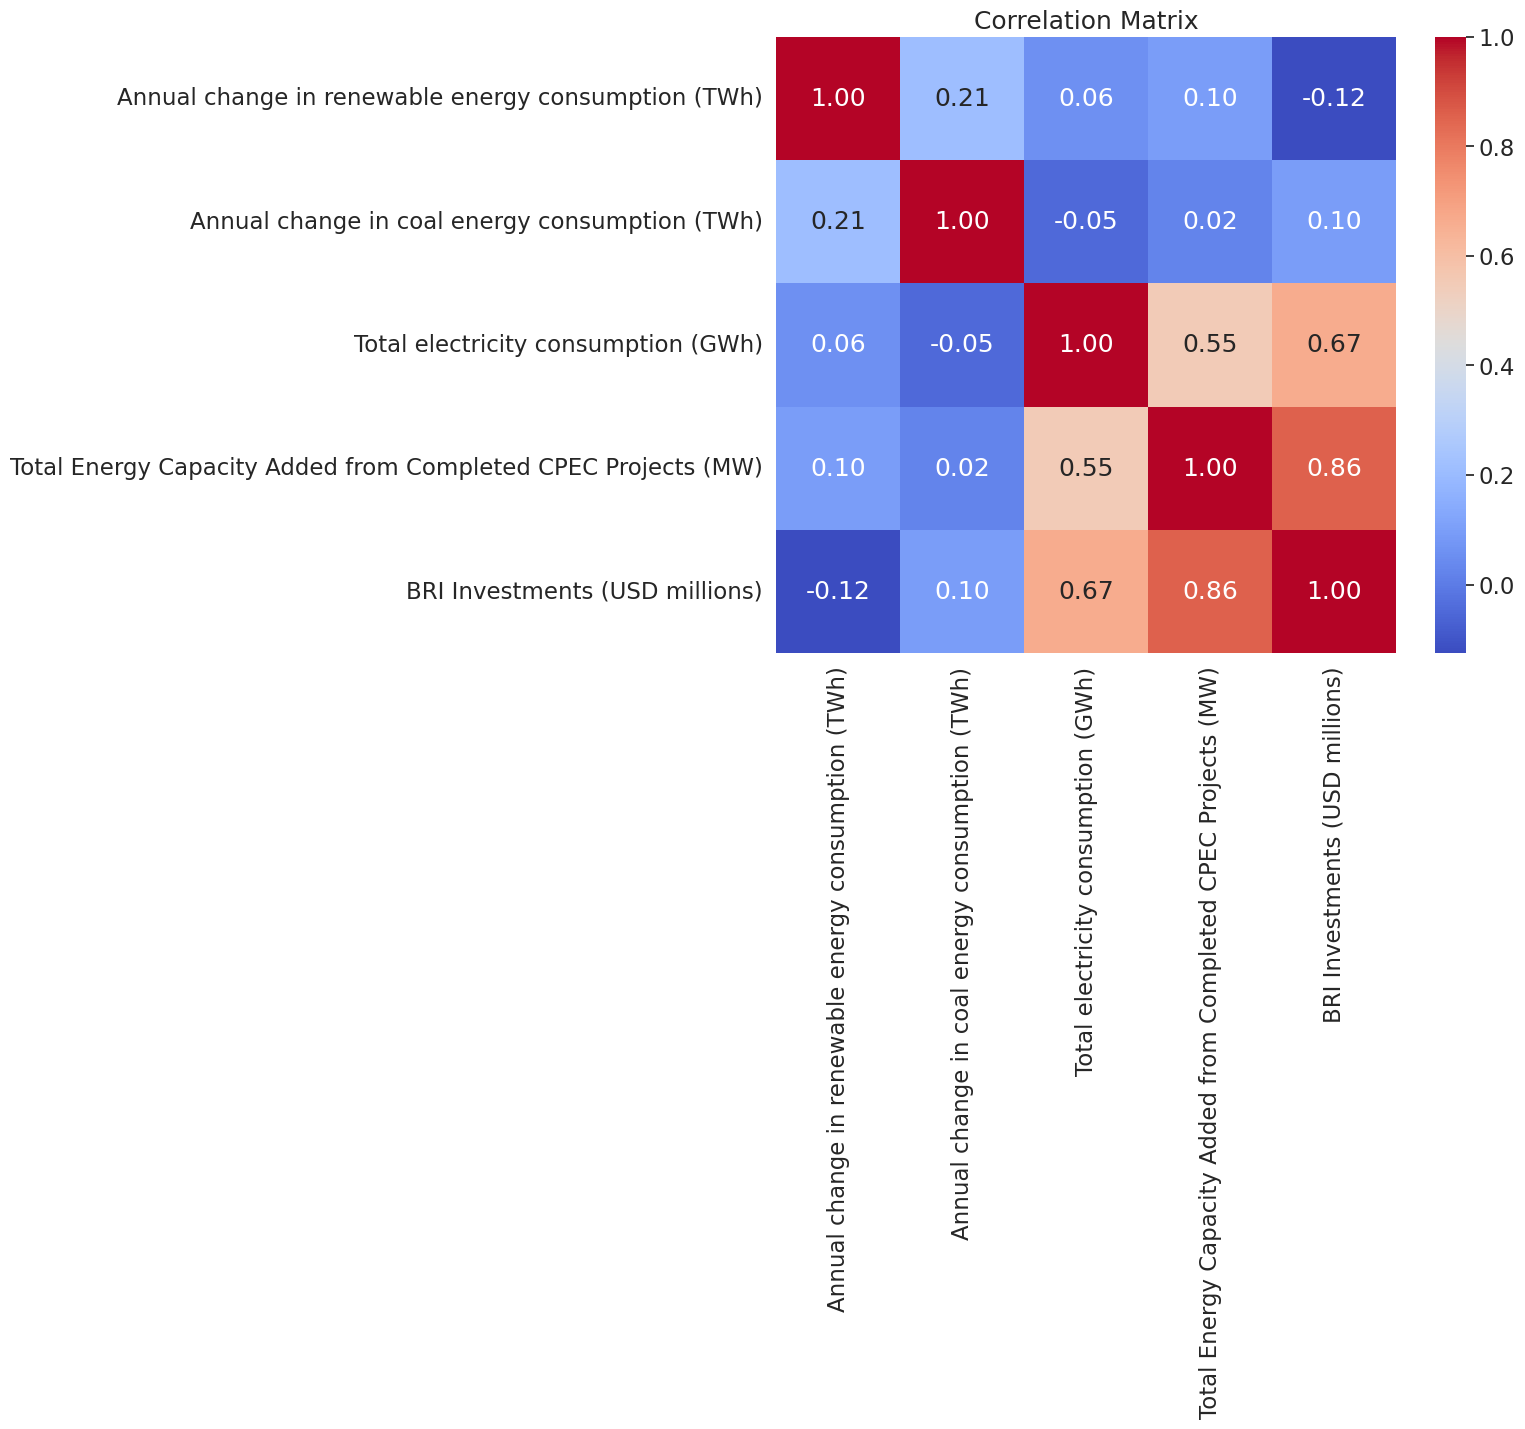

In [20]:
sns.heatmap(df[['Annual change in renewable energy consumption (TWh)', 'Annual change in coal energy consumption (TWh)', 'Total electricity consumption (GWh)', 'Total Energy Capacity Added from Completed CPEC Projects (MW)', 'BRI Investments (USD millions)']].corr(), # plot a correlation matrix
            annot=True, # show the correlation values on the plot
            fmt=".2f", # set the format of the correlation values to be two decimal places
            cmap='coolwarm') # set the color palette to be coolwarm (blue for negative correlations, red for positive correlations)

plt.title('Correlation Matrix') # add a title

In [23]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

model2_sm = ols('Q("Annual CO2 emissions (millon tonnes)") ~ Q("Annual change in renewable energy consumption (TWh)") + Q("Annual change in coal energy consumption (TWh)") + Q("Total electricity consumption (GWh)") + Q("Total Energy Capacity Added from Completed CPEC Projects (MW)") + Q("BRI Investments (USD millions)")', data=df).fit()

print(model2_sm.summary())

                                        OLS Regression Results                                       
Dep. Variable:     Q("Annual CO2 emissions (millon tonnes)")   R-squared:                       0.978
Model:                                                   OLS   Adj. R-squared:                  0.865
Method:                                        Least Squares   F-statistic:                     8.692
Date:                                       Thu, 23 Jan 2025   Prob (F-statistic):              0.252
Time:                                               15:25:41   Log-Likelihood:                -17.916
No. Observations:                                          7   AIC:                             47.83
Df Residuals:                                              1   BIC:                             47.51
Df Model:                                                  5                                         
Covariance Type:                                   nonrobust                      

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
